In [7]:
import numpy as np
import sys
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline 

data = pd.read_csv('./data/Ames_Housing_Price_Data.csv', index_col=0)
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)


(2580, 81)
(2579, 81)


In [8]:
print(data.nunique().head())

PID           2579
GrLivArea     1213
SalePrice      870
MSSubClass      16
MSZoning         7
dtype: int64


In [9]:
describe_df = data.describe(include='all')
describe_df.to_csv(r'describe_df.csv', index = True)
describe_df.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,2.579000e+03,2579.000000,2579.00000,2579.000000,2579,2117.000000,2579.000000,2579,168,2579,...,2579.000000,2579.00000,9,525,97,2579.000000,2579.000000,2579.000000,2579,2579
unique,NaN,NaN,NaN,NaN,7,NaN,NaN,2,2,4,...,NaN,NaN,4,4,4,NaN,NaN,NaN,10,6
top,NaN,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,...,NaN,NaN,TA,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,NaN,NaN,2007,NaN,NaN,2569,105,1640,...,NaN,NaN,3,301,88,NaN,NaN,NaN,2391,2413
mean,7.147546e+08,1485.950368,178053.44242,57.694843,NaN,68.510628,10119.269484,NaN,NaN,NaN,...,16.162854,1.66266,NaN,NaN,NaN,48.750291,6.152385,2007.839085,NaN,NaN


Length of these features:  43
Feature is:  Neighborhood
['SWISU' 'Edwards' 'IDOTRR' 'OldTown' 'NWAmes' 'Blmngtn' 'Mitchel'
 'NridgHt' 'NAmes' 'CollgCr' 'SawyerW' 'MeadowV' 'BrDale' 'Gilbert'
 'Timber' 'Somerst' 'BrkSide' 'NoRidge' 'Sawyer' 'Crawfor' 'Greens'
 'ClearCr' 'GrnHill' 'StoneBr' 'Veenker' 'NPkVill' 'Blueste' 'Landmrk']


C:\Users\pengu\Anaconda3\lib\site-packages\pandas\core\series.py:2829: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


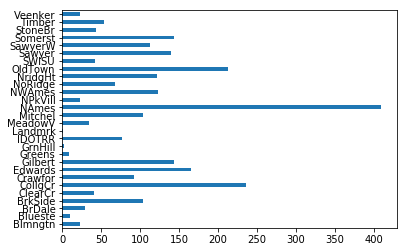

Feature is:  Exterior2nd
['Wd Sdng' 'HdBoard' 'MetalSd' 'VinylSd' 'Wd Shng' 'Plywood' 'Stucco'
 'CmentBd' 'AsbShng' 'ImStucc' 'BrkFace' 'Brk Cmn' 'CBlock' 'AsphShn'
 'Stone' 'PreCast']


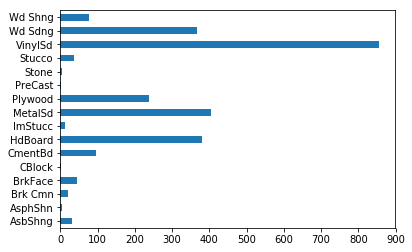

Feature is:  Exterior1st
['Wd Sdng' 'HdBoard' 'MetalSd' 'VinylSd' 'WdShing' 'Plywood' 'Stucco'
 'CemntBd' 'BrkFace' 'AsbShng' 'BrkComm' 'ImStucc' 'AsphShn' 'CBlock'
 'PreCast']


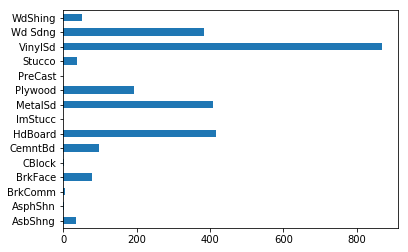

Feature is:  SaleType
['WD ' 'ConLD' 'New' 'Oth' 'ConLw' 'COD' 'CWD' 'Con' 'ConLI' 'VWD']


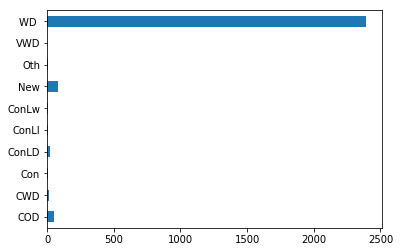

Feature is:  Condition1
['Norm' 'RRAn' 'PosN' 'Artery' 'RRAe' 'Feedr' 'PosA' 'RRNn' 'RRNe']


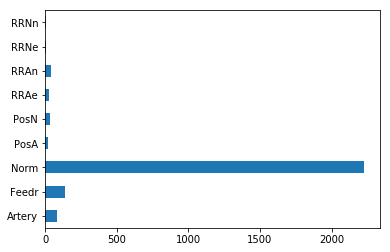

Feature is:  Condition2
['Norm' 'PosN' 'Feedr' 'Artery' 'PosA' 'RRNn' 'RRAn' 'RRAe']


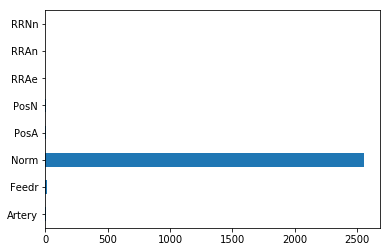

Feature is:  HouseStyle
['1Story' '2Story' 'SFoyer' 'SLvl' '1.5Fin' '2.5Unf' '1.5Unf' '2.5Fin']


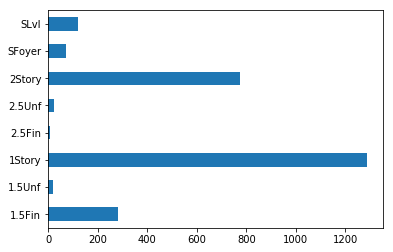

Feature is:  MSZoning
['RL' 'C (all)' 'RM' 'FV' 'RH' 'I (all)' 'A (agr)']


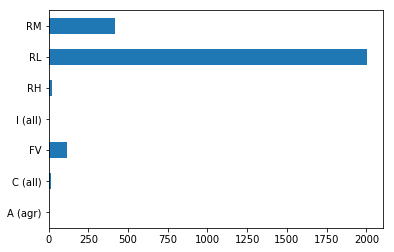

Feature is:  RoofMatl
['CompShg' 'Tar&Grv' 'WdShake' 'WdShngl' 'Metal' 'Roll' 'Membran']


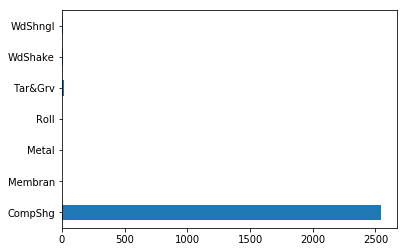

Feature is:  Functional
['Typ' 'Min2' 'Min1' 'Mod' 'Sal' 'Maj1' 'Maj2']


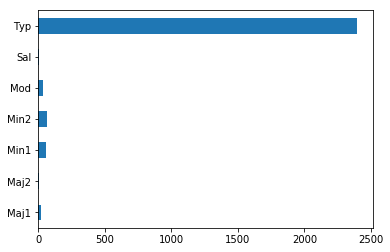

Feature is:  Heating
['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']


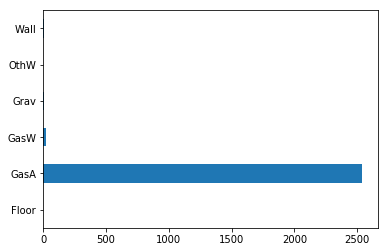

Feature is:  RoofStyle
['Gable' 'Hip' 'Mansard' 'Gambrel' 'Flat' 'Shed']


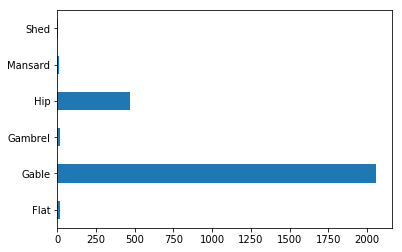

Feature is:  Foundation
['CBlock' 'BrkTil' 'PConc' 'Slab' 'Stone' 'Wood']


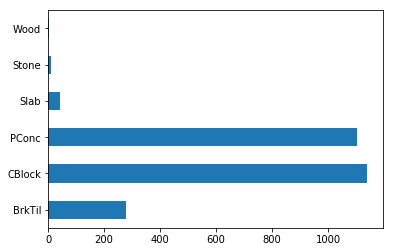

Feature is:  BsmtFinType1
['Rec' 'GLQ' 'ALQ' 'Unf' nan 'BLQ' 'LwQ']


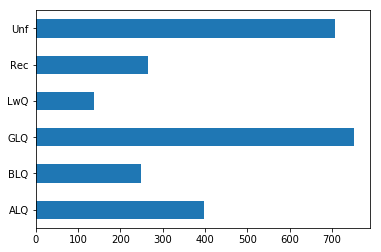

Feature is:  BsmtFinType2
['Unf' 'ALQ' nan 'GLQ' 'BLQ' 'LwQ' 'Rec']


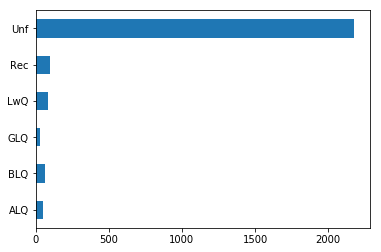

Feature is:  SaleCondition
['Normal' 'Partial' 'AdjLand' 'Abnorml' 'Alloca' 'Family']


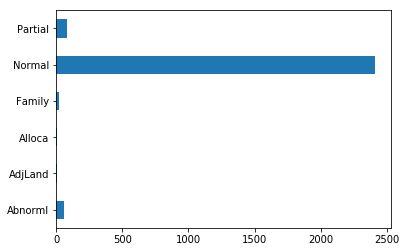

Feature is:  GarageType
['Detchd' 'Attchd' 'BuiltIn' 'Basment' nan '2Types' 'CarPort']


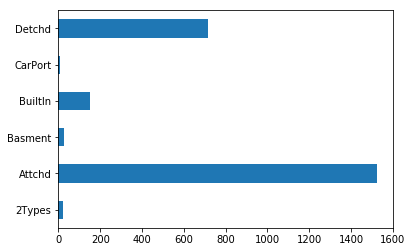

Feature is:  HeatingQC
['TA' 'Ex' 'Gd' 'Fa' 'Po']


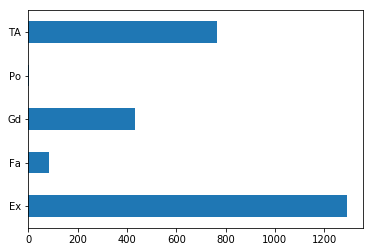

Feature is:  ExterCond
['TA' 'Gd' 'Fa' 'Ex' 'Po']


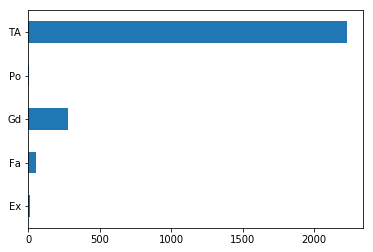

Feature is:  LotConfig
['Corner' 'Inside' 'FR2' 'CulDSac' 'FR3']


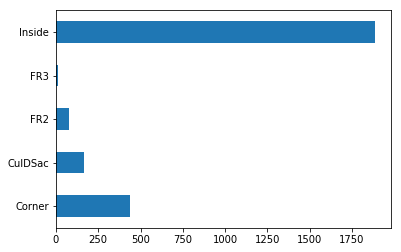

Feature is:  BldgType
['1Fam' 'TwnhsE' '2fmCon' 'Twnhs' 'Duplex']


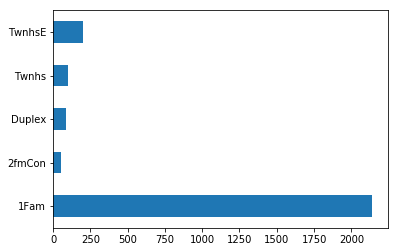

Feature is:  GarageQual
['TA' nan 'Fa' 'Gd' 'Po' 'Ex']


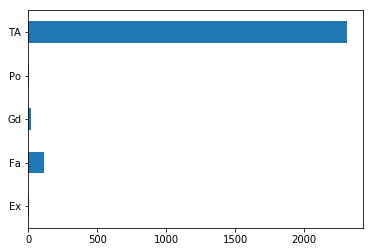

Feature is:  GarageCond
['TA' 'Po' nan 'Fa' 'Gd' 'Ex']


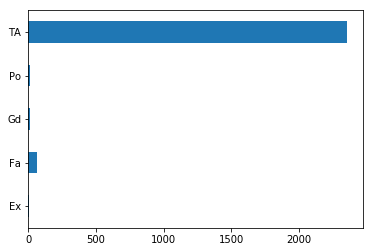

Feature is:  FireplaceQu
['Gd' nan 'Ex' 'TA' 'Fa' 'Po']


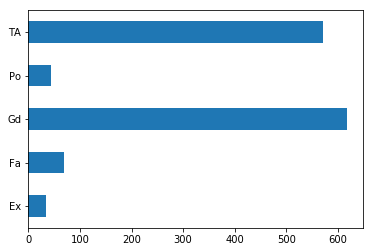

Feature is:  KitchenQual
['TA' 'Gd' 'Ex' 'Fa' 'Po']


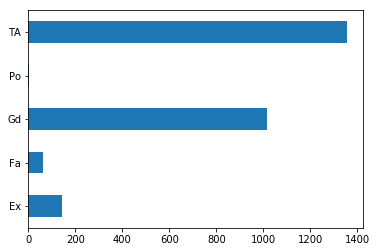

Feature is:  BsmtCond
['TA' nan 'Fa' 'Gd' 'Ex' 'Po']


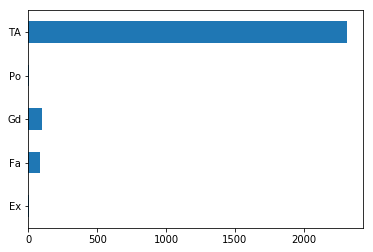

Feature is:  BsmtQual
['TA' 'Gd' 'Fa' nan 'Ex' 'Po']


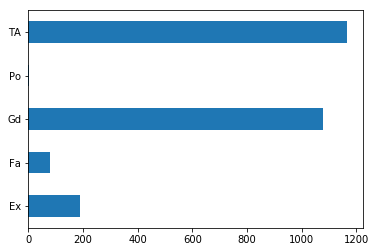

Feature is:  MasVnrType
['None' 'BrkFace' 'Stone' 'BrkCmn' nan]


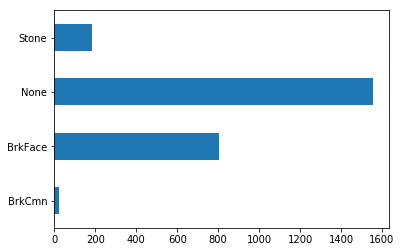

Feature is:  BsmtExposure
['No' 'Mn' nan 'Gd' 'Av']


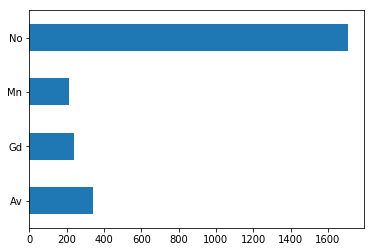

Feature is:  PoolQC
[nan 'Ex' 'Gd' 'Fa' 'TA']


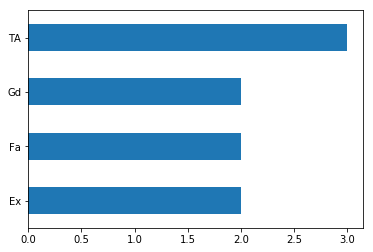

Feature is:  ExterQual
['TA' 'Gd' 'Fa' 'Ex']


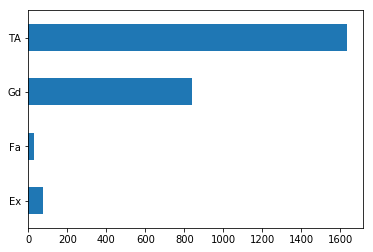

Feature is:  MiscFeature
[nan 'Shed' 'Othr' 'Gar2' 'TenC']


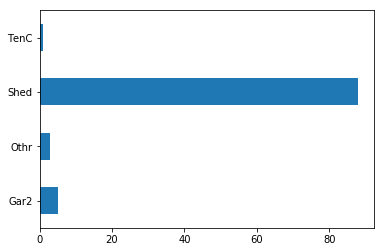

Feature is:  Electrical
['SBrkr' 'FuseF' 'FuseA' 'FuseP' nan]


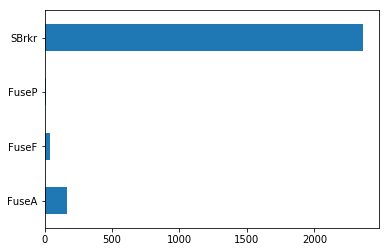

Feature is:  LandContour
['Lvl' 'Bnk' 'HLS' 'Low']


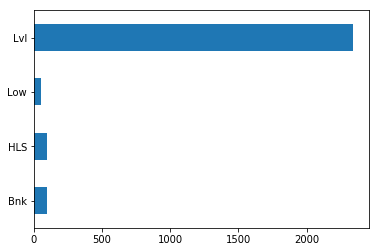

Feature is:  LotShape
['Reg' 'IR1' 'IR3' 'IR2']


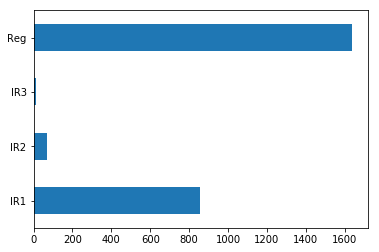

Feature is:  Fence
[nan 'GdWo' 'MnPrv' 'GdPrv' 'MnWw']


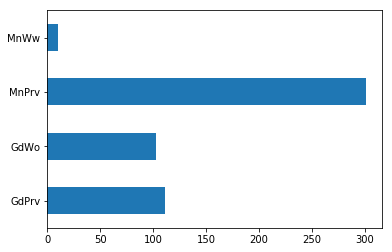

Feature is:  GarageFinish
['Unf' 'Fin' 'RFn' nan]


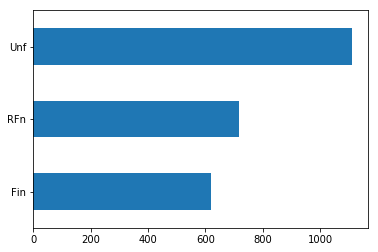

Feature is:  PavedDrive
['Y' 'N' 'P']


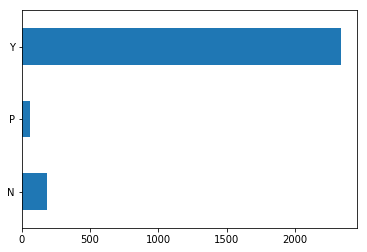

Feature is:  LandSlope
['Gtl' 'Mod' 'Sev']


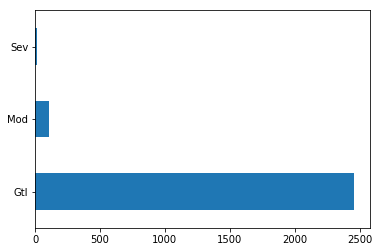

Feature is:  CentralAir
['Y' 'N']


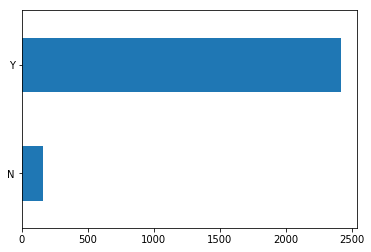

Feature is:  Utilities
['AllPub' 'NoSewr']


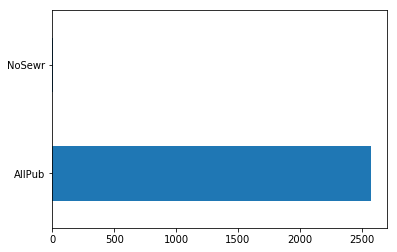

Feature is:  Alley
[nan 'Pave' 'Grvl']


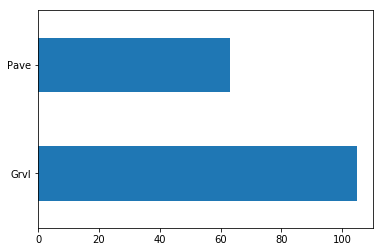

Feature is:  Street
['Pave' 'Grvl']


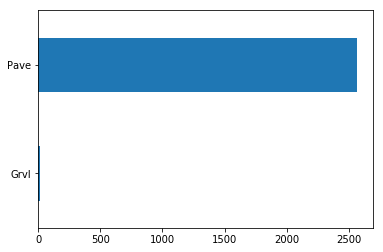

In [10]:
#get all columns with unique values
unique_s = describe_df.iloc[1, :]
unique_s.sort_values(inplace=True, ascending=False)
feat_uniq = unique_s[unique_s >= 0].index

print("Length of these features: ", len(feat_uniq))
for col in feat_uniq:
    print("Feature is: ", col)
    print(data[col].unique())
    data[col].value_counts().sort_index().plot(kind='barh', rot=0)
    plt.show()



In [11]:
# Nixon features: BsmtCond, MiscFeature(?), Electrical(?), LandContour, PavedDrive(?), LandSlope(?), Utilities, Alley(?), Street
# Aleksey features: SaleType, Condition1, Condition2, RoofMatl, Functional, Heating, BsmtFinType2, SaleCondition, ExterCond, GarageQual
print(feat_uniq)

Index(['Neighborhood', 'Exterior2nd', 'Exterior1st', 'SaleType', 'Condition1',
       'Condition2', 'HouseStyle', 'MSZoning', 'RoofMatl', 'Functional',
       'Heating', 'RoofStyle', 'Foundation', 'BsmtFinType1', 'BsmtFinType2',
       'SaleCondition', 'GarageType', 'HeatingQC', 'ExterCond', 'LotConfig',
       'BldgType', 'GarageQual', 'GarageCond', 'FireplaceQu', 'KitchenQual',
       'BsmtCond', 'BsmtQual', 'MasVnrType', 'BsmtExposure', 'PoolQC',
       'ExterQual', 'MiscFeature', 'Electrical', 'LandContour', 'LotShape',
       'Fence', 'GarageFinish', 'PavedDrive', 'LandSlope', 'CentralAir',
       'Utilities', 'Alley', 'Street'],
      dtype='object')


In [12]:
data["SalePricePerGLA"] = data["SalePrice"] / data["GrLivArea"]

al_features = ["SaleType", "Condition1", "Condition2", "RoofMatl","Functional", "Heating",
              "BsmtFinType2", "SaleCondition", "ExterCond", "GarageQual"]

SaleType: Type of sale
WD	Warranty Deed - Conventional
CWD	Warranty Deed - Cash
VWD	Warranty Deed - VA Loan
New	Home just constructed and sold
COD	Court Officer Deed/Estate
Con	Contract 15% Down payment regular terms
ConLw	Contract Low Down payment and low interest
ConLI	Contract Low Interest
ConLD	Contract Low Down
Oth	Other
          SaleType
SaleType          
COD             50
CWD             11
Con              5
ConLD           23
ConLI            7
ConLw            8
New             79
Oth              4
VWD              1
WD            2391
Original size:  (2579, 2)
After NAs dropped:  (2579, 2)


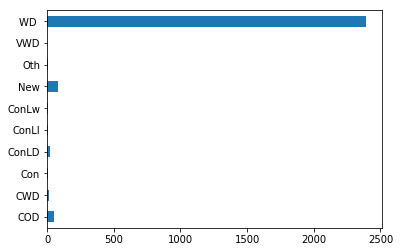

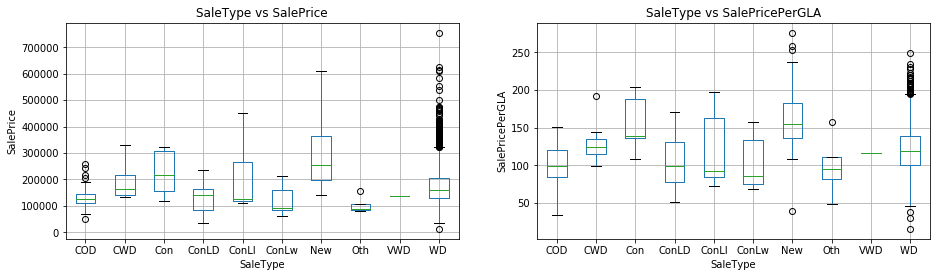

In [13]:
# Aleksey features: SaleType
print("SaleType: Type of sale")
print("WD\tWarranty Deed - Conventional")
print("CWD\tWarranty Deed - Cash")
print("VWD\tWarranty Deed - VA Loan")
print("New\tHome just constructed and sold")
print("COD\tCourt Officer Deed/Estate")
print("Con\tContract 15% Down payment regular terms")
print("ConLw\tContract Low Down payment and low interest")
print("ConLI\tContract Low Interest")
print("ConLD\tContract Low Down")
print("Oth\tOther")

feature = al_features[0]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice"]].dropna().groupby(by=feature,axis=0).agg({feature:"count"}))

print("Original size: ", data[[feature,"SalePrice"]].shape)
print("After NAs dropped: ", data[[feature,"SalePrice"]].dropna().shape)

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()


Condition1: Proximity to various conditions
Artery	Adjacent to arterial street
Feedr	Adjacent to feeder street
Norm	Normal
RRNn	Within 200' of North-South Railroad
RRAn	Adjacent to North-South Railroad
PosN	Near positive off-site feature--park, greenbelt, etc.
PosA	Adjacent to postive off-site feature
RRNe	Within 200' of East-West Railroad
RRAe	Adjacent to East-West Railroad

             Condition1
Condition1            
Artery              81
Feedr              137
Norm              2227
PosA                19
PosN                37
RRAe                26
RRAn                40
RRNe                 4
RRNn                 8
Original size:  (2579, 2)
After NAs dropped:  (2579, 2)


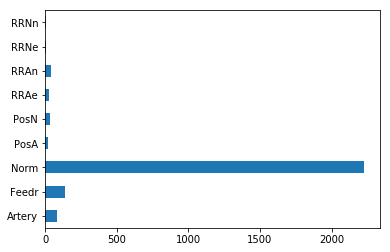

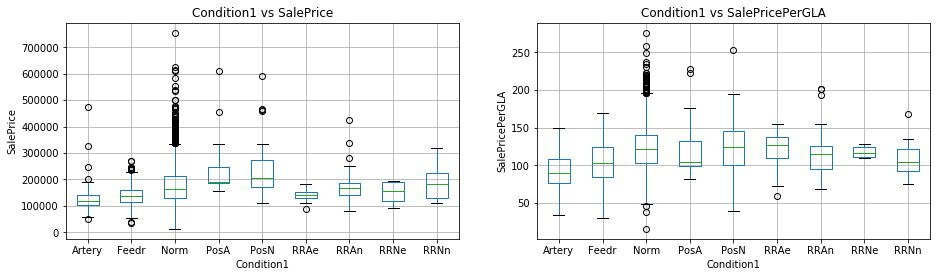

In [17]:
# Aleksey features Condition1
#print("")
print("Condition1: Proximity to various conditions")
print("Artery\tAdjacent to arterial street")
print("Feedr\tAdjacent to feeder street")
print("Norm\tNormal")
print("RRNn\tWithin 200' of North-South Railroad")
print("RRAn\tAdjacent to North-South Railroad")
print("PosN\tNear positive off-site feature--park, greenbelt, etc.")
print("PosA\tAdjacent to postive off-site feature")
print("RRNe\tWithin 200' of East-West Railroad")
print("RRAe\tAdjacent to East-West Railroad")
feature = al_features[1]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print("\n",data[[feature,"SalePrice"]].dropna().groupby(by=feature,axis=0).agg({feature:"count"}))

print("Original size: ", data[[feature,"SalePrice"]].shape)
print("After NAs dropped: ", data[[feature,"SalePrice"]].dropna().shape)

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

Condition2: Proximity to various conditions (if more than one is present)
Artery	Adjacent to arterial street
Feedr	Adjacent to feeder street	
Norm	Normal	
RRNn	Within 200' of North-South Railroad
RRAn	Adjacent to North-South Railroad
PosN	Near positive off-site feature--park, greenbelt, etc.
PosA	Adjacent to postive off-site feature
RRNe	Within 200' of East-West Railroad
RRAe	Adjacent to East-West Railroad

             Condition2
Condition2            
Artery               3
Feedr               12
Norm              2554
PosA                 3
PosN                 3
RRAe                 1
RRAn                 1
RRNn                 2
Original size:  (2579, 2)
After NAs dropped:  (2579, 2)


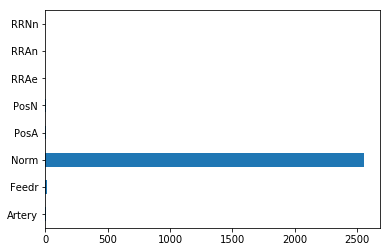

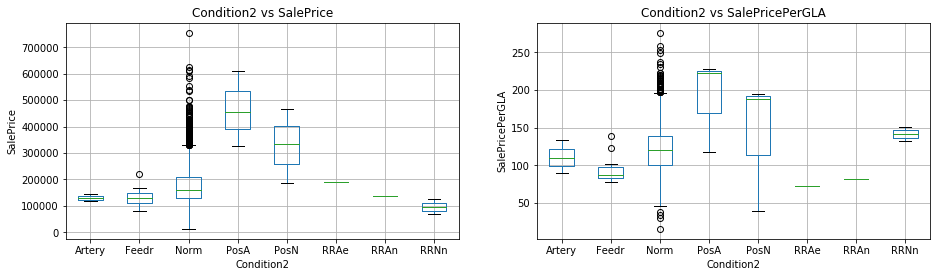

In [19]:
# Aleksey features Condition2
#print("\t\n")
print("Condition2: Proximity to various conditions (if more than one is present)")
print("Artery	Adjacent to arterial street")
print("Feedr	Adjacent to feeder street	")
print("Norm	Normal	")
print("RRNn	Within 200' of North-South Railroad")
print("RRAn	Adjacent to North-South Railroad")
print("PosN	Near positive off-site feature--park, greenbelt, etc.")
print("PosA	Adjacent to postive off-site feature")
print("RRNe	Within 200' of East-West Railroad")
print("RRAe	Adjacent to East-West Railroad")

feature = al_features[2]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print("\n",data[[feature,"SalePrice"]].dropna().groupby(by=feature,axis=0).agg({feature:"count"}))

print("Original size: ", data[[feature,"SalePrice"]].shape)
print("After NAs dropped: ", data[[feature,"SalePrice"]].dropna().shape)

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

RoofMatl: Roof material
ClyTile	Clay or Tile
CompShg	Standard (Composite) Shingle
Membran	Membrane
Metal	Metal
Roll	Roll
Tar&Grv	Gravel & Tar
WdShake	Wood Shakes
WdShngl	Wood Shingles

           RoofMatl
RoofMatl          
CompShg       2543
Membran          1
Metal            1
Roll             1
Tar&Grv         18
WdShake          8
WdShngl          7
Original size:  (2579, 2)
After NAs dropped:  (2579, 2)


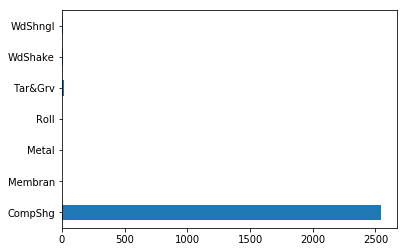

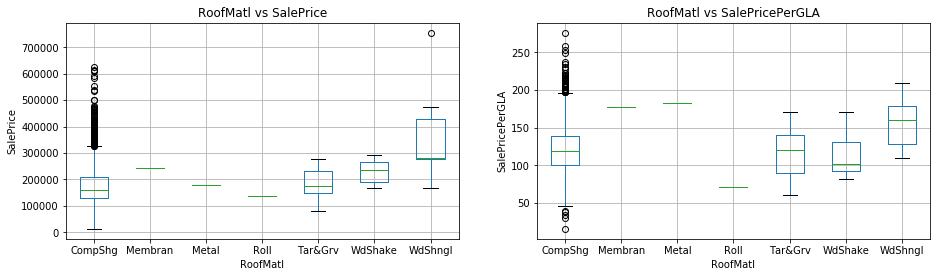

In [22]:
# Aleksey features RoofMatl
#print("")
print("RoofMatl: Roof material")
print("ClyTile	Clay or Tile")
print("CompShg	Standard (Composite) Shingle")
print("Membran	Membrane")
print("Metal	Metal")
print("Roll	Roll")
print("Tar&Grv	Gravel & Tar")
print("WdShake	Wood Shakes")
print("WdShngl	Wood Shingles")

feature = al_features[3]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print("\n",data[[feature,"SalePrice"]].dropna().groupby(by=feature,axis=0).agg({feature:"count"}))

print("Original size: ", data[[feature,"SalePrice"]].shape)
print("After NAs dropped: ", data[[feature,"SalePrice"]].dropna().shape)

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

Functional: Home functionality (Assume typical unless deductions are warranted)
Typ	Typical Functionality
Min1	Minor Deductions 1
Min2	Minor Deductions 2
Mod	Moderate Deductions
Maj1	Major Deductions 1
Maj2	Major Deductions 2
Sev	Severely Damaged
Sal	Salvage only

             Functional
Functional            
Maj1                18
Maj2                 7
Min1                57
Min2                66
Mod                 32
Sal                  1
Typ               2398
Original size:  (2579, 2)
After NAs dropped:  (2579, 2)


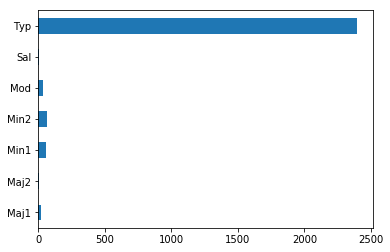

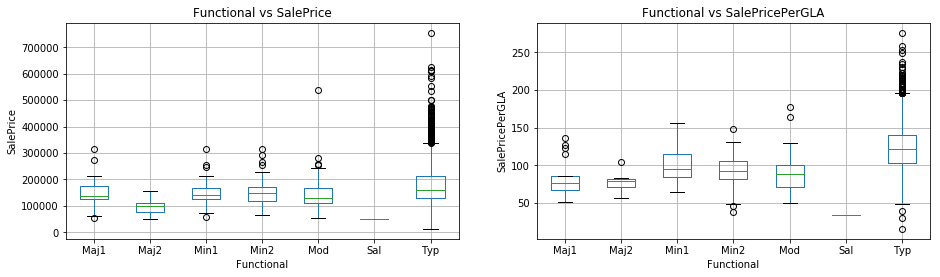

In [23]:
# Aleksey feature Functional
#print("")
print("Functional: Home functionality (Assume typical unless deductions are warranted)")
print("Typ	Typical Functionality")
print("Min1	Minor Deductions 1")
print("Min2	Minor Deductions 2")
print("Mod	Moderate Deductions")
print("Maj1	Major Deductions 1")
print("Maj2	Major Deductions 2")
print("Sev	Severely Damaged")
print("Sal	Salvage only")

feature = al_features[4]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print("\n",data[[feature,"SalePrice"]].dropna().groupby(by=feature,axis=0).agg({feature:"count"}))

print("Original size: ", data[[feature,"SalePrice"]].shape)
print("After NAs dropped: ", data[[feature,"SalePrice"]].dropna().shape)

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

Heating: Type of heating
Floor	Floor Furnace
GasA	Gas forced warm air furnace
GasW	Gas hot water or steam heat
Grav	Gravity furnace	
OthW	Hot water or steam heat other than gas
Wall	Wall furnace

          Heating
Heating         
Floor          1
GasA        2539
GasW          25
Grav           7
OthW           2
Wall           5
Original size:  (2579, 2)
After NAs dropped:  (2579, 2)


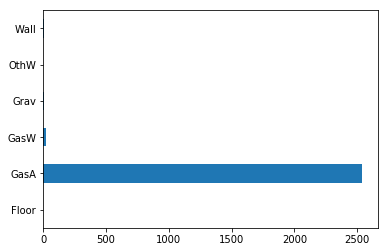

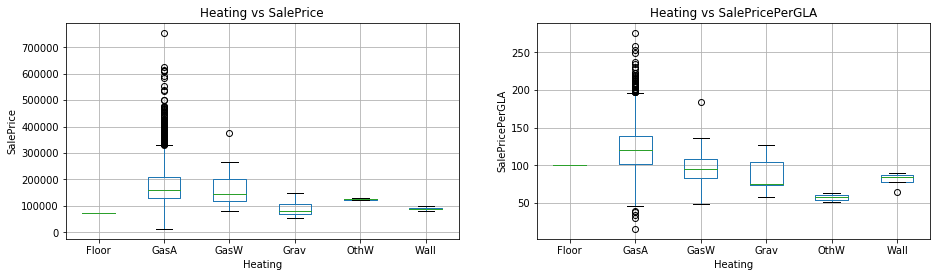

In [24]:
# Aleksey feature Heating
#print("")
print("Heating: Type of heating")
print("Floor	Floor Furnace")
print("GasA	Gas forced warm air furnace")
print("GasW	Gas hot water or steam heat")
print("Grav	Gravity furnace	")
print("OthW	Hot water or steam heat other than gas")
print("Wall	Wall furnace")

feature = al_features[5]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print("\n",data[[feature,"SalePrice"]].dropna().groupby(by=feature,axis=0).agg({feature:"count"}))

print("Original size: ", data[[feature,"SalePrice"]].shape)
print("After NAs dropped: ", data[[feature,"SalePrice"]].dropna().shape)

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

BsmtFinType2: Rating of basement finished area (if multiple types)
GLQ	Good Living Quarters
ALQ	Average Living Quarters
BLQ	Below Average Living Quarters	
Rec	Average Rec Room
LwQ	Low Quality
Unf	Unfinshed
NA	No Basement

               BsmtFinType2
BsmtFinType2              
ALQ                     53
BLQ                     64
GLQ                     32
LwQ                     84
Rec                     97
Unf                   2179
Original size:  (2579, 2)
After NAs dropped:  (2509, 2)


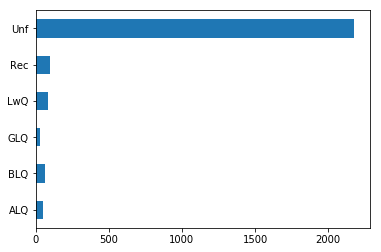

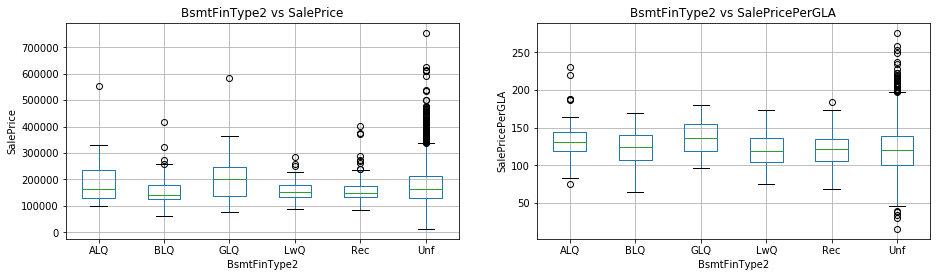

In [26]:
# Aleksey feature BsmtFinType2
#print("")
print("BsmtFinType2: Rating of basement finished area (if multiple types)")
print("GLQ	Good Living Quarters")
print("ALQ	Average Living Quarters")
print("BLQ	Below Average Living Quarters	")
print("Rec	Average Rec Room")
print("LwQ	Low Quality")
print("Unf	Unfinshed")
print("NA	No Basement")

feature = al_features[6]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print("\n",data[[feature,"SalePrice"]].dropna().groupby(by=feature,axis=0).agg({feature:"count"}))

print("Original size: ", data[[feature,"SalePrice"]].shape)
print("After NAs dropped: ", data[[feature,"SalePrice"]].dropna().shape)

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

SaleCondition: Condition of sale
Normal	Normal Sale
Abnorml	Abnormal Sale -  trade, foreclosure, short sale
AdjLand	Adjoining Land Purchase
Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
Family	Sale between family members
Partial	Home was not completed when last assessed (associated with New Homes)

                SaleCondition
SaleCondition               
Abnorml                   61
AdjLand                    2
Alloca                     4
Family                    17
Normal                  2413
Partial                   82
Original size:  (2579, 2)
After NAs dropped:  (2579, 2)


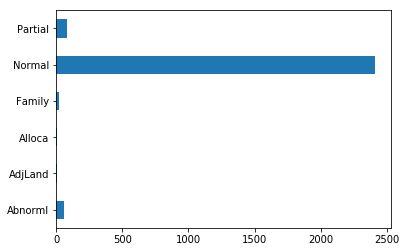

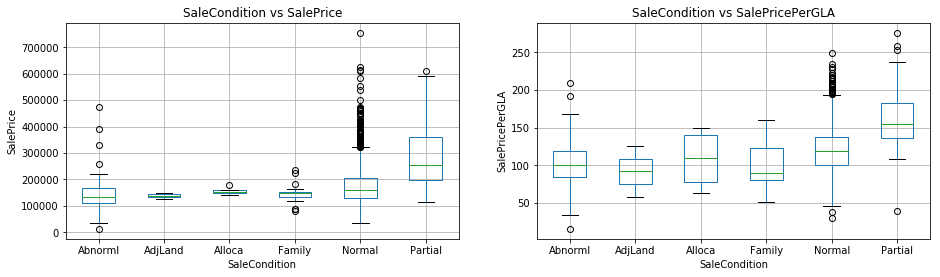

In [27]:
# Aleksey feature SaleCondition
#print("")
print("SaleCondition: Condition of sale")
print("Normal	Normal Sale")
print("Abnorml	Abnormal Sale -  trade, foreclosure, short sale")
print("AdjLand	Adjoining Land Purchase")
print("Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	")
print("Family	Sale between family members")
print("Partial	Home was not completed when last assessed (associated with New Homes)")

feature = al_features[7]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print("\n",data[[feature,"SalePrice"]].dropna().groupby(by=feature,axis=0).agg({feature:"count"}))

print("Original size: ", data[[feature,"SalePrice"]].shape)
print("After NAs dropped: ", data[[feature,"SalePrice"]].dropna().shape)

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

ExterCond: Evaluates the present condition of the material on the exterior
Ex	Excellent
Gd	Good
TA	Average/Typical
Fa	Fair
Po	Poor

            ExterCond
ExterCond           
Ex                11
Fa                56
Gd               279
Po                 2
TA              2231
Original size:  (2579, 2)
After NAs dropped:  (2579, 2)


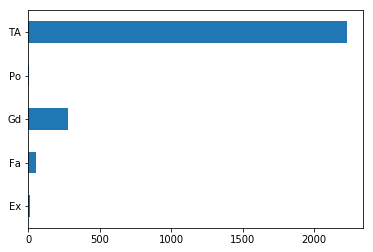

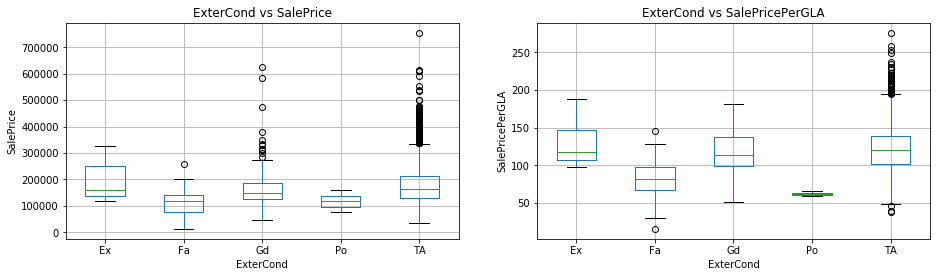

In [28]:
# Aleksey feature ExterCond
#print("")
print("ExterCond: Evaluates the present condition of the material on the exterior")
print("Ex	Excellent")
print("Gd	Good")
print("TA	Average/Typical")
print("Fa	Fair")
print("Po	Poor")

feature = al_features[8]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print("\n",data[[feature,"SalePrice"]].dropna().groupby(by=feature,axis=0).agg({feature:"count"}))

print("Original size: ", data[[feature,"SalePrice"]].shape)
print("After NAs dropped: ", data[[feature,"SalePrice"]].dropna().shape)

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()

GarageQual: Garage quality
Ex	Excellent
Gd	Good
TA	Typical/Average
Fa	Fair
Po	Poor
NA	No Garage

             GarageQual
GarageQual            
Ex                   3
Fa                 110
Gd                  22
Po                   4
TA                2311
Original size:  (2579, 2)
After NAs dropped:  (2450, 2)


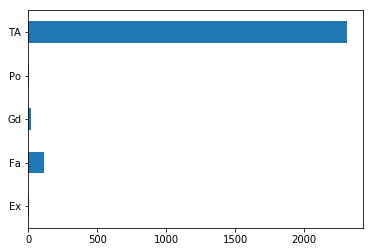

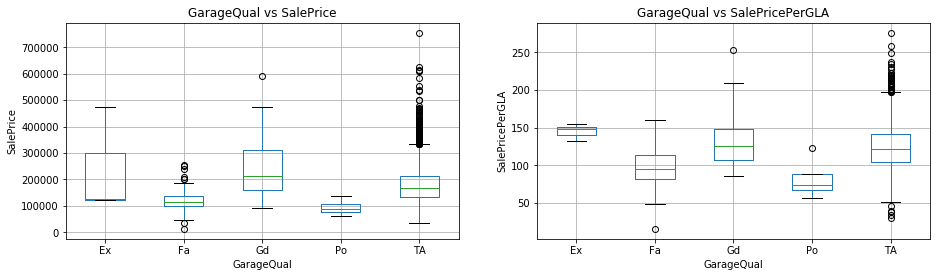

In [29]:
# Aleksey feature GarageQual
#print("")
print("GarageQual: Garage quality")
print("Ex	Excellent")
print("Gd	Good")
print("TA	Typical/Average")
print("Fa	Fair")
print("Po	Poor")
print("NA	No Garage")
    
feature = al_features[9]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print("\n",data[[feature,"SalePrice"]].dropna().groupby(by=feature,axis=0).agg({feature:"count"}))

print("Original size: ", data[[feature,"SalePrice"]].shape)
print("After NAs dropped: ", data[[feature,"SalePrice"]].dropna().shape)

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()